## Global Template Assessment

1. Global Template (Excel file and supporting Python Code). Using the attached dataset, please create an Excel spreadsheet with the following columns:


    - Country
    - Period
    - SNL1
    - Facility
    - Product
    - SOH
    - AMI
    - MOS
 
Assumptions:
- Each tab is a unique SNL1
- Organisation unit is the Facility Name
- Every other column is the SOH and AMI. (Column with SH is SOH, column with AMC is AMI)
- MOS is calculated as SOH/AMI


2. Descriptive Statistics. Using the Global Template, please conduct some descriptive statistics. For example, SOH by SNL1, outliers, etc. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Table of Contents

- 1.0. Accessing Data
- 2.0. Data Processing
    - 2.1. Reshaping Data for "Shire"
    - 2.2. Seperating "SH" for "Shire"
    - 2.3. Seperating "AMC" for "Shire"
    - 2.4. Merging "SH" and "AMC" for "Shire"
    - 2.5. Extracting product name
    - 2.6. Renaming and Rearranging Columns
    - 2.7. Adding Additional Columns
- 3.0. Setting up a Function for reshaping remaining data
    - 3.1. Cleaned Data
    - 3.2. Data shape
    - 3.3. Combining all Data
    - 3.4. Data Exploration
- 4.0. Descriptive Statistics
    - 4.1. Histograms for SOH and AMI
    - 4.2. Descriptive statistics for SOH by SNL1
    - 4.3. Mean values for "SOH" by SNL1
    - 4.4. Descriptive statistics for AMI by SNL1
    - 4.5. Mean values for "AMI" by SNL1
    - 4.6. Heatmap for Numeric Variables
    - 4.7. Detecting Outliers using Boxplot
    - 4.8. Descriptive statistics for SOH by Product
    - 4.9. Mean values for SOH, AMI and MOS by SNL1 and Facility

### 1.0. Accessing Data

In [2]:
Shire     = pd.read_csv('C:/Users/ushai/Dropbox/Data Science/Datasets/Health/Shire.csv')
Polombia  = pd.read_csv('C:/Users/ushai/Dropbox/Data Science/Datasets/Health/Polombia.csv')
Sangala   = pd.read_csv('C:/Users/ushai/Dropbox/Data Science/Datasets/Health/Sangala.csv')
Turgistan = pd.read_csv('C:/Users/ushai/Dropbox/Data Science/Datasets/Health/Turgistan.csv')
Urkesh    = pd.read_csv('C:/Users/ushai/Dropbox/Data Science/Datasets/Health/Urkesh.csv')
Nukula_Atoll = pd.read_csv('C:/Users/ushai/Dropbox/Data Science/Datasets/Health/Nukula_Atoll.csv')
Molvania  = pd.read_csv('C:/Users/ushai/Dropbox/Data Science/Datasets/Health/Molvania.csv')
Hogwarts  = pd.read_csv('C:/Users/ushai/Dropbox/Data Science/Datasets/Health/Hogwarts.csv')
Flausenthurm = pd.read_csv('C:/Users/ushai/Dropbox/Data Science/Datasets/Health/Flausenthurm.csv')
Westerose = pd.read_csv('C:/Users/ushai/Dropbox/Data Science/Datasets/Health/Westerose.csv')

### 2.0. Data Processing

In [3]:
Shire.head()

,Organisation unit,InformedPT-26SH Zidovudine/Lamivudine /Nevirapine 300/150/200mg,INDInformedPT-26AMC Zidovudine/Lamivudine /Nevirapine,InformedPT-24SH Zidovudine/ Lamivudine 300/150mg,INDInformedPT-24AMC Zidovudine/ Lamivudine 300/150mg,InformedPT-20SH Tenofovir/Lamivudine 300/300mg,INDInformedPT-20AMC Tenofovir/Lamivudine 300/300mg,InformedPT-21SH Tenofovir/Lamivudine/ Efavirenz 300/300/600mg,INDInformedPT-21AMC Tenofovir/Lamivudine/ Efavirenz 300/300/600mg,InformedPT-538SH Tenofovir/Lamivudine/Efavirenz(30) 300/300/400,...,InformedPT-53SH Condoms: Male condoms,InformedPT-53AMC Condoms: Male condoms AMC,InformedPT-73SH Determine HIV 1/2 kit,InformedPT-73AMC Determine HIV 1/2 kit AMC,InformedPT-74SH SD Bioline,InformedPT-74AMC SD Bioline AMC,InformedPT-75SH UniGold,InformedPT-75AMC UniGold AMC,InformedPT-48SH Isoniazid 300mg,InformedPT-48AMC Isoniazid 300mg AMC
0,entertaining,509,225,1198,1042,1347,1724,1778,1688,75,...,1372,307,1988,198,1110,210,978,1244,1358,212
1,succinct,1996,867,20,285,743,1912,481,648,1290,...,884,25,965,93,1356,1882,1648,1319,1852,911
2,mature,570,1299,1703,1133,594,802,1756,1502,1278,...,866,1150,39,1556,1580,1102,641,975,1631,1996
3,hover,1345,401,316,1958,1984,243,1557,442,493,...,245,282,1371,1409,1377,1069,996,198,1684,68
4,join,1973,455,1623,687,497,947,902,7,1852,...,1740,1506,52,709,148,1581,1904,1333,769,759


### 2.1. Reshaping Data for 'Shire'

In [4]:
# Reshaping data for "Shire"
Shire = pd.melt(Shire, id_vars=['Organisation unit'])

In [5]:
Shire.head()

,Organisation unit,variable,value
0,entertaining,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,509
1,succinct,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,1996
2,mature,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,570
3,hover,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,1345
4,join,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,1973


In [6]:
Shire.shape

(1344, 3)

### 2.2. Seperating "SH" for Shire

In [7]:
# Seperating product Id's having "SH" from rest of the data.
Shire_SH = Shire[Shire['variable'].str.contains("SH")].reset_index(drop=True)
Shire_SH.index.name = 'Index'

In [8]:
Shire_SH.shape

(672, 3)

In [9]:
Shire_SH.head()

,Organisation unit,variable,value
Index,,,
0,entertaining,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,509
1,succinct,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,1996
2,mature,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,570
3,hover,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,1345
4,join,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,1973


### 2.3. Seperating "AMC" for Shire

In [10]:
# Seperating product Id's having "AMC" from rest of the data
Shire_AMC = Shire[Shire['variable'].str.contains("AMC")].reset_index(drop=True)
Shire_AMC.index.name = 'Index'

In [11]:
Shire_AMC.shape

(672, 3)

In [12]:
Shire_AMC.head()

,Organisation unit,variable,value
Index,,,
0,entertaining,INDInformedPT-26AMC Zidovudine/Lamivudine /Nev...,225
1,succinct,INDInformedPT-26AMC Zidovudine/Lamivudine /Nev...,867
2,mature,INDInformedPT-26AMC Zidovudine/Lamivudine /Nev...,1299
3,hover,INDInformedPT-26AMC Zidovudine/Lamivudine /Nev...,401
4,join,INDInformedPT-26AMC Zidovudine/Lamivudine /Nev...,455


### 2.4.  Merging Shire "SH" and Shire "AMC"

In [13]:
# We merge newly created dataframes Shire_SH and Shire_AMC.
# So we can see the values side by side for both "SH" and "AMC" rather stacked over each other.

Shire = pd.merge(Shire_SH, Shire_AMC, how='inner', on = 'Index')

In [14]:
Shire.head()

,Organisation unit_x,variable_x,value_x,Organisation unit_y,variable_y,value_y
Index,,,,,,
0,entertaining,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,509,entertaining,INDInformedPT-26AMC Zidovudine/Lamivudine /Nev...,225
1,succinct,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,1996,succinct,INDInformedPT-26AMC Zidovudine/Lamivudine /Nev...,867
2,mature,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,570,mature,INDInformedPT-26AMC Zidovudine/Lamivudine /Nev...,1299
3,hover,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,1345,hover,INDInformedPT-26AMC Zidovudine/Lamivudine /Nev...,401
4,join,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,1973,join,INDInformedPT-26AMC Zidovudine/Lamivudine /Nev...,455


In [15]:
# Removing duplicates after merging, "Organization unit_y" and "variable_y" containing AMC.
# These are not needed, product names will be extracted from variable_x.

Shire = Shire.drop(['Organisation unit_y','variable_y'],axis=1)

In [16]:
Shire.head()

,Organisation unit_x,variable_x,value_x,value_y
Index,,,,
0,entertaining,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,509,225
1,succinct,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,1996,867
2,mature,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,570,1299
3,hover,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,1345,401
4,join,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,1973,455


### 2.5. Extracting product name

In [17]:
# To extract product name we split values for the column labelled "variable_x".
# The split occurs at letter 'H'.
# We create a seperate dataframe.

Shire_product_name = Shire["variable_x"].str.split("H", n = 1, expand = True)

In [18]:
Shire_product_name.head()

,0,1
Index,,
0,InformedPT-26S,Zidovudine/Lamivudine /Nevirapine 300/150/200mg
1,InformedPT-26S,Zidovudine/Lamivudine /Nevirapine 300/150/200mg
2,InformedPT-26S,Zidovudine/Lamivudine /Nevirapine 300/150/200mg
3,InformedPT-26S,Zidovudine/Lamivudine /Nevirapine 300/150/200mg
4,InformedPT-26S,Zidovudine/Lamivudine /Nevirapine 300/150/200mg


In [19]:
# Removing Column '0' and adding column'1' to Shire    
Shire["Product"]= Shire_product_name[1] 

In [20]:
Shire.head()

,Organisation unit_x,variable_x,value_x,value_y,Product
Index,,,,,
0,entertaining,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,509,225,Zidovudine/Lamivudine /Nevirapine 300/150/200mg
1,succinct,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,1996,867,Zidovudine/Lamivudine /Nevirapine 300/150/200mg
2,mature,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,570,1299,Zidovudine/Lamivudine /Nevirapine 300/150/200mg
3,hover,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,1345,401,Zidovudine/Lamivudine /Nevirapine 300/150/200mg
4,join,InformedPT-26SH Zidovudine/Lamivudine /Nevirap...,1973,455,Zidovudine/Lamivudine /Nevirapine 300/150/200mg


In [21]:
# Now we can drop "variable_x" containing both product code and name joined together.
Shire.drop(columns =["variable_x"], inplace = True) 

In [22]:
Shire.head()

,Organisation unit_x,value_x,value_y,Product
Index,,,,
0,entertaining,509,225,Zidovudine/Lamivudine /Nevirapine 300/150/200mg
1,succinct,1996,867,Zidovudine/Lamivudine /Nevirapine 300/150/200mg
2,mature,570,1299,Zidovudine/Lamivudine /Nevirapine 300/150/200mg
3,hover,1345,401,Zidovudine/Lamivudine /Nevirapine 300/150/200mg
4,join,1973,455,Zidovudine/Lamivudine /Nevirapine 300/150/200mg


### 2.6. Renaming and Rearranging Columns

In [23]:
# Renaming Columns as per requirement
Shire = Shire.rename(columns = {'Organisation unit_x':'Facility','value_x':'SOH','value_y':'AMI'})

In [24]:
Shire.head()

,Facility,SOH,AMI,Product
Index,,,,
0,entertaining,509,225,Zidovudine/Lamivudine /Nevirapine 300/150/200mg
1,succinct,1996,867,Zidovudine/Lamivudine /Nevirapine 300/150/200mg
2,mature,570,1299,Zidovudine/Lamivudine /Nevirapine 300/150/200mg
3,hover,1345,401,Zidovudine/Lamivudine /Nevirapine 300/150/200mg
4,join,1973,455,Zidovudine/Lamivudine /Nevirapine 300/150/200mg


In [25]:
# Rearranging columns
Shire = Shire[['Facility','Product','SOH','AMI']]

In [26]:
Shire.head()

,Facility,Product,SOH,AMI
Index,,,,
0,entertaining,Zidovudine/Lamivudine /Nevirapine 300/150/200mg,509,225
1,succinct,Zidovudine/Lamivudine /Nevirapine 300/150/200mg,1996,867
2,mature,Zidovudine/Lamivudine /Nevirapine 300/150/200mg,570,1299
3,hover,Zidovudine/Lamivudine /Nevirapine 300/150/200mg,1345,401
4,join,Zidovudine/Lamivudine /Nevirapine 300/150/200mg,1973,455


### 2.7. Adding Additional Columns

In [27]:
# Adding additional columns 'Country', 'Period', 'SNL1'
# Since country name is not given we assume that each tab in the excel sheet referred to as SNL1 is a country name.
Shire['Country'] = "Shire"
Shire['Period'] = '2018 Oct'
Shire['SNL1'] = 'Shire'
Shire['MOS'] = Shire['SOH']/Shire['AMI']

In [28]:
# Rearranging columns one last time
Shire = Shire[['Country','Period','SNL1','Facility','Product','SOH','AMI','MOS']]

In [29]:
Shire.head()

,Country,Period,SNL1,Facility,Product,SOH,AMI,MOS
Index,,,,,,,,
0,Shire,2018 Oct,Shire,entertaining,Zidovudine/Lamivudine /Nevirapine 300/150/200mg,509,225,2.262222
1,Shire,2018 Oct,Shire,succinct,Zidovudine/Lamivudine /Nevirapine 300/150/200mg,1996,867,2.302191
2,Shire,2018 Oct,Shire,mature,Zidovudine/Lamivudine /Nevirapine 300/150/200mg,570,1299,0.438799
3,Shire,2018 Oct,Shire,hover,Zidovudine/Lamivudine /Nevirapine 300/150/200mg,1345,401,3.354115
4,Shire,2018 Oct,Shire,join,Zidovudine/Lamivudine /Nevirapine 300/150/200mg,1973,455,4.336264


### 3.0. Setting up a Function for reshaping  remaining data

In [30]:
def cleaned_data(dataset, country):

    # Reshaping data
    dataset = pd.melt(dataset, id_vars=['Organisation unit'])

    # Seperating product Id's having "SH" from rest of the data
    dataset_SH = dataset[dataset['variable'].str.contains("SH")].reset_index(drop=True)
    dataset_SH.index.name = 'Index'

    # Seperating product Id's having "AMC" from rest of the data
    dataset_AMC = dataset[dataset['variable'].str.contains("AMC")].reset_index(drop=True)
    dataset_AMC.index.name = 'Index'

    # We merge newly created dataframes dataset_SH and dataset_AMC
    # So we can see the values side by side for both "SH" and "AMC" rather stacked over each other.

    dataset = pd.merge(dataset_SH, dataset_AMC, how ='inner', on = 'Index')

    # Now we remove duplicates after merging, "Organization unit_y" and variable_y containing AMC.
    # These are not needed, product names will be extracted from variable_x

    dataset = dataset.drop(['Organisation unit_y','variable_y'],axis=1)

    # To extract product name we split values for the column labelled variable_x
    # The split occurs at letter 'H'
    # We create a seperate dataframe

    dataset_product_name = dataset["variable_x"].str.split("H", n = 1, expand = True)

    # Removing Column '0' and adding column'1' to dataset    
    dataset["Product"]= dataset_product_name[1] 

    # Dropping variable_x  containing both product code and name
    dataset.drop(columns =["variable_x"], inplace = True) 

    # Renaming Columns as per requirement
    dataset = dataset.rename(columns = {'Organisation unit_x':'Facility','value_x':'SOH','value_y':'AMI'})

    # Rearranging columns
    dataset = dataset[['Facility','Product','SOH','AMI']]

    # Adding additional columns 'Country', 'Period', 'SNL1'
    # Since country name is not given we assume that each tab in the excel sheet referred to as SNL1 is a country name.
    dataset['Country'] = country
    dataset['Period'] = '2018 Oct'
    dataset['SNL1'] = country
    dataset['MOS'] = dataset['SOH']/dataset['AMI']

    # Rearranging columns one last time
    dataset = dataset[['Country','Period','SNL1','Facility','Product','SOH','AMI','MOS']]
    
    return dataset

### 3.1. Cleaned Data

In [31]:
# Cleaned remaining DataFrames
Sangala   = cleaned_data(Sangala, "Sangala")
Turgistan = cleaned_data(Turgistan, "Turgistan")
Urkesh    = cleaned_data(Urkesh, "Urkesh")
Nukula_Atoll = cleaned_data(Nukula_Atoll, "Nukula_Atoll")
Hogwarts  = cleaned_data(Hogwarts, "Hogwarts")
Flausenthurm = cleaned_data(Flausenthurm, "Flausenthurm")
Westerose = cleaned_data(Westerose, "Westerose")

### 3.2. Data shape

In [32]:
print("Shire shape:", Shire.shape)
print("Sangala shape:", Sangala.shape)
print("Turgistan shape:", Turgistan.shape)
print("Urkesh shape:", Urkesh.shape)
print("Nukula_Atoll shape:", Nukula_Atoll.shape)
print("Hogwarts shape:", Hogwarts.shape)
print("Flausenthurm shape:", Flausenthurm.shape)
print("Westerose shape:", Westerose.shape)

Shire shape: (672, 8)
Sangala shape: (416, 8)
Turgistan shape: (384, 8)
Urkesh shape: (544, 8)
Nukula_Atoll shape: (416, 8)
Hogwarts shape: (480, 8)
Flausenthurm shape: (736, 8)
Westerose shape: (1600, 8)


### 3.3. Combining all Data

In [33]:
# Creating a master list
Master_list = pd.concat([Shire, Sangala, Turgistan, Urkesh, Nukula_Atoll,
                         Hogwarts, Flausenthurm, Westerose],ignore_index=True).round(2)

In [34]:
print("Master_list shape:", Master_list.shape)

Master_list shape: (5248, 8)


In [35]:
Master_list.head()

,Country,Period,SNL1,Facility,Product,SOH,AMI,MOS
0,Shire,2018 Oct,Shire,entertaining,Zidovudine/Lamivudine /Nevirapine 300/150/200mg,509,225,2.26
1,Shire,2018 Oct,Shire,succinct,Zidovudine/Lamivudine /Nevirapine 300/150/200mg,1996,867,2.30
2,Shire,2018 Oct,Shire,mature,Zidovudine/Lamivudine /Nevirapine 300/150/200mg,570,1299,0.44
3,Shire,2018 Oct,Shire,hover,Zidovudine/Lamivudine /Nevirapine 300/150/200mg,1345,401,3.35
4,Shire,2018 Oct,Shire,join,Zidovudine/Lamivudine /Nevirapine 300/150/200mg,1973,455,4.34


In [35]:
# Saving data to a CSV, using .to_csv.
Master_list.to_csv('Global_template.csv', index = False)

### 3.4. Data Exploration

In [36]:
# Converting infinite values to nan
Master_list = Master_list.replace([np.inf, -np.inf], np.nan)

In [37]:
# Identifying null values
Master_list.isnull().sum()

Country     0
Period      0
SNL1        0
Facility    0
Product     0
SOH         0
AMI         0
MOS         5
dtype: int64

In [38]:
# Dropping null values
Master_list = Master_list.dropna().reset_index(drop = True)

In [39]:
# Verifying data types
Master_list.dtypes

Country      object
Period       object
SNL1         object
Facility     object
Product      object
SOH           int64
AMI           int64
MOS         float64
dtype: object

### 4.0. Descriptive Statistics 

In [40]:
# Descriptive Statistics for SOH, AMI and MOS
Master_list.describe().round(2)

,SOH,AMI,MOS
count,5243.00,5243.00,5243.00
mean,1007.79,984.15,3.90
std,573.25,582.39,25.38
min,0.00,1.00,0.00
25%,517.00,472.00,0.52
50%,1010.00,978.00,1.03
75%,1501.00,1488.00,2.15
max,2000.00,1999.00,1192.00


### 4.1. Histograms for SOH and AMI

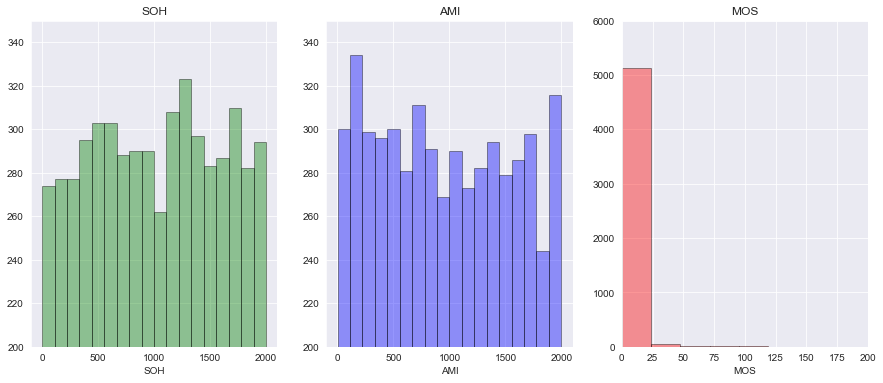

In [42]:
# Histogram for all numeric variables

sns.set_style('darkgrid')
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.distplot(Master_list['SOH'], kde = False, hist_kws=dict(edgecolor="black"), color='green').set(ylim=(200, 350))
plt.title('SOH')

plt.subplot(1,3,2)
sns.distplot(Master_list['AMI'], kde = False, hist_kws=dict(edgecolor="black"), color='blue').set(ylim=(200, 350))
plt.title('AMI')

plt.subplot(1,3,3)
sns.distplot(Master_list['MOS'], kde = False, hist_kws=dict(edgecolor="black"), color='red').set(ylim=(0, 6000))
plt.xlim(0,200)
plt.title('MOS')
                                                                                                  
plt.subplots_adjust(hspace=0.3)
plt.show()

### 4.2. Descriptive statistics for SOH by SNL1

In [43]:
# Descriptive statistics for SOH by SNL1
# Values sorted by min
SOH_by_SNL1 = Master_list.groupby(['SNL1'])['SOH'].describe().reset_index()

In [44]:
SOH_by_SNL1

,SNL1,count,mean,std,min,25%,50%,75%,max
0,Flausenthurm,735.0,991.119728,579.694436,3.0,503.00,995.0,1491.00,1990.0
1,Hogwarts,479.0,1020.215031,566.573856,8.0,535.00,1005.0,1507.50,1995.0
2,Nukula_Atoll,415.0,997.604819,556.296716,9.0,535.50,985.0,1459.50,1997.0
3,Sangala,416.0,1060.319712,578.846552,12.0,565.50,1005.5,1590.25,1998.0
4,Shire,672.0,1010.553571,565.431052,2.0,539.50,1019.0,1483.00,1999.0
5,Turgistan,382.0,994.952880,591.837144,5.0,509.25,966.0,1524.50,2000.0
6,Urkesh,544.0,1002.733456,561.639494,5.0,530.25,1057.0,1438.25,1992.0
7,Westerose,1600.0,1004.333125,578.167063,0.0,496.00,1032.0,1497.25,1999.0


### 4.3. Mean values for "SOH" by SNL1

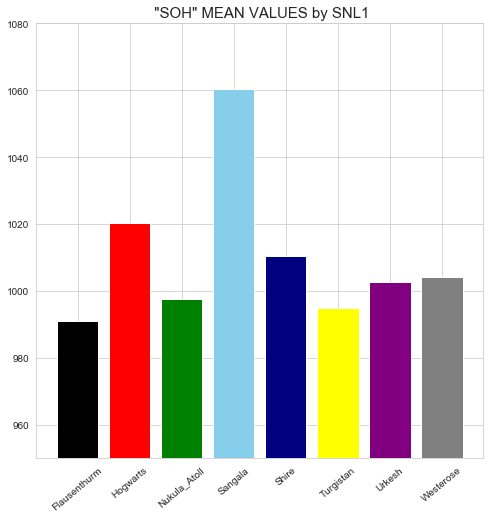

In [45]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
plt.bar(SOH_by_SNL1['SNL1'], SOH_by_SNL1['mean'], edgecolor = 'white',
        color=['black', 'red', 'green', 'skyblue', 'navy', 'yellow', 'purple', 'grey'])
plt.ylim(950,1080)
plt.xticks(rotation=40)

plt.title(''' "SOH" MEAN VALUES by SNL1''',fontsize=15)

plt.show()

### 4.4. Descriptive statistics for AMI by SNL1

In [46]:
# Descriptive statistics for AMI by SNL1
# Values sorted by min
AMI_by_SNL1 = Master_list.groupby(['SNL1'])['AMI'].describe().reset_index().sort_values(by='min', ascending=1)

In [47]:
AMI_by_SNL1

,SNL1,count,mean,std,min,25%,50%,75%,max
0,Flausenthurm,735.0,988.551020,590.585035,1.0,456.50,992.0,1500.00,1996.0
1,Hogwarts,479.0,971.455115,603.922494,2.0,395.50,958.0,1531.00,1997.0
5,Turgistan,382.0,988.125654,569.491148,2.0,494.50,930.0,1479.75,1994.0
4,Shire,672.0,970.212798,585.083100,3.0,460.00,947.5,1496.50,1999.0
6,Urkesh,544.0,1000.275735,554.455638,3.0,542.75,1039.0,1438.75,1999.0
7,Westerose,1600.0,979.236875,584.255177,3.0,468.75,977.0,1493.50,1999.0
3,Sangala,416.0,1009.733173,583.552641,6.0,497.75,1014.0,1461.75,1996.0
2,Nukula_Atoll,415.0,982.033735,580.644053,7.0,470.50,969.0,1478.50,1982.0


### 4.5. Mean values for "AMI" by SNL1

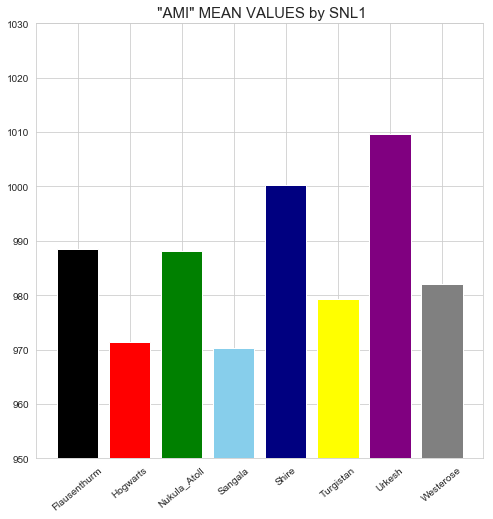

In [48]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
plt.bar(SOH_by_SNL1['SNL1'], AMI_by_SNL1['mean'], edgecolor = 'white',
        color=['black', 'red', 'green', 'skyblue', 'navy', 'yellow', 'purple', 'grey'])
plt.ylim(950,1030)
plt.xticks(rotation=40)

plt.title(''' "AMI" MEAN VALUES by SNL1''',fontsize=15)

plt.show()

### 4.6. Heatmap for Numeric Variables

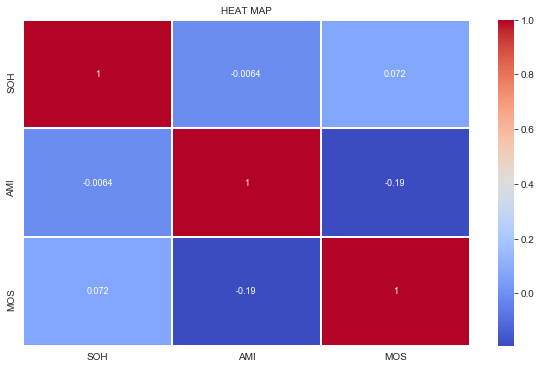

In [49]:
# plotting a heat map for numeric variables
plt.figure(figsize=(10,6))
sns.heatmap(Master_list.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('HEAT MAP', fontsize=10)
plt.show()

### 4.7. Detecting Outliers using Boxplot

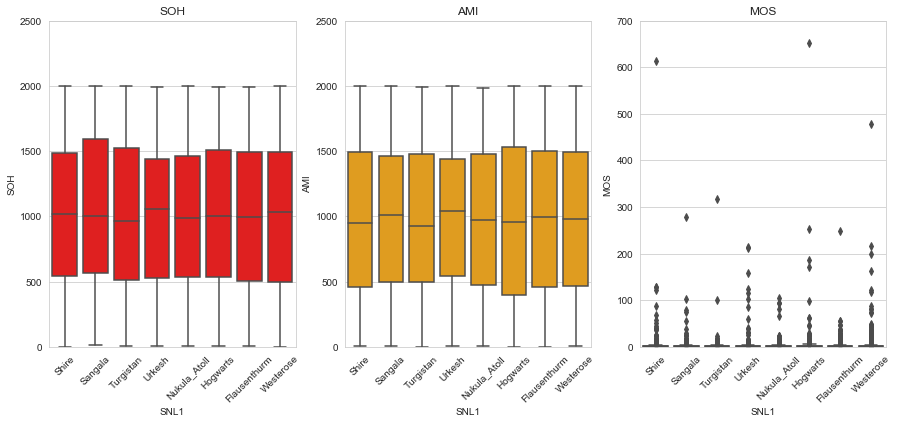

In [50]:
sns.set_style('whitegrid')

plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.boxplot(data=Master_list, x = 'SNL1', y='SOH', color="red")
plt.ylim(0,2500)
plt.xticks(rotation=45)
plt.title('SOH')

plt.subplot(1,3,2)
sns.boxplot(data=Master_list, x = 'SNL1', y='AMI', color="orange")
plt.ylim(0,2500)
plt.xticks(rotation=45)
plt.title('AMI')

plt.subplot(1,3,3)
sns.boxplot(data=Master_list, x = 'SNL1', y='MOS', color="red")
plt.ylim(0,700)
plt.xticks(rotation=45)
plt.title('MOS')

plt.show()

### 4.8. Descriptive statistics for SOH by Product

In [51]:
# Values sorted by min
Master_list.groupby(['Product'])['SOH'].describe().reset_index().sort_values(by='min', ascending=1)

,Product,count,mean,std,min,25%,50%,75%,max
6,Determine HIV 1/2 kit,164.0,1041.957317,574.288189,0.0,619.50,1079.0,1514.00,1992.0
17,Nevirapine suspension 10mg/ml,164.0,1048.493902,615.111936,2.0,436.75,1143.5,1603.25,1992.0
10,Etravirine 100mg,163.0,1049.705521,565.172048,2.0,524.00,1101.0,1500.00,1998.0
22,Tenofovir/Lamivudine 300/300mg,164.0,1010.054878,586.784858,3.0,505.00,986.5,1490.50,1997.0
8,Efavirenz 200mg,164.0,1006.140244,575.142030,3.0,519.00,972.5,1499.00,1992.0
3,Atazanavir 300mg,164.0,994.707317,571.627039,4.0,488.50,994.5,1458.75,1998.0
0,Abacavir 300mg,164.0,1035.585366,602.714024,5.0,512.75,1076.0,1585.50,1989.0
25,Tenofovir/Lamivudine/Efavirenz(90) 300/300/400,164.0,1002.597561,572.736363,5.0,528.75,1005.0,1470.25,1991.0
5,Condoms: Male condoms,164.0,1021.701220,553.962338,5.0,541.00,1075.5,1508.50,1953.0
16,Nevirapine 200mg,164.0,1028.652439,576.815252,6.0,529.00,1107.5,1490.25,1972.0


### 4.9. Mean values for SOH, AMI and MOS by SNL1 and Facility

In [52]:
# To view all rows for a dataframe use pd.set_option('display.max_rows', None)
# Values can be sorted as per requirements.

Master_list.groupby(['SNL1', 'Facility']).mean()

SOH          AMI        MOS
SNL1         Facility                                        
Flausenthurm argue         994.750000  1198.625000   2.646250
             attend       1143.093750   849.718750   2.817187
             badge        1063.843750   857.718750   3.293125
             bead          974.406250  1098.062500   2.932813
             confuse      1103.156250   895.937500   4.481562
             defective     918.500000   913.468750  39.247187
             follow       1101.093750  1020.750000   1.920000
             grubby        924.000000  1000.312500   2.219687
             injure        984.875000  1053.156250   2.399375
             label         834.718750  1035.593750   1.706875
             luxuriant     952.593750   962.125000   2.605313
             notice       1048.093750   926.218750   2.149688
             reach         895.258065  1318.129032   0.908387
             rude         1098.562500   954.875000   3.347188
             sheep         859.718750   928.687500   2.467812
             striped      1085.281250   887.312500   2.685000
             summer        885.125000   925.218750   2.009688
             tasty         986.593750  1110.156250   3.616875
             temper       1012.031250   885.531250   2.083750
             troubled     1035.406250   818.500000   3.906250
             way          1029.812500   986.437500   9.686563
             wrestle       867.093750   921.812500   2.114688
Hogwarts     adventurous   910.437500  1034.906250   7.939375
             axiomatic     954.156250   980.625000   4.626562
             bathe        1154.125000  1023.343750   2.007812
             cough        1036.718750   965.750000   2.618125
             delightful    993.250000   954.406250  22.785625
             ear          1063.062500   988.500000   1.861250
             mundane      1154.843750   934.937500   9.432188
             near         1198.774194   833.387097  12.851935
...                               ...          ...        ...
Westerose    handle       1134.343750  1163.750000   1.837188
             improve       997.468750  1071.093750   1.482187
             increase     1020.343750  1149.312500   1.674063
             lacking       865.781250  1035.406250   3.902187
             lamentable    913.125000   900.781250   2.543125
             mate         1135.687500   806.937500   2.830937
             mute         1064.812500   985.468750   2.293750
             noxious       895.593750   853.562500   5.520313
             obtainable    941.718750   920.968750   3.398438
             parched      1144.000000   929.500000  18.407500
             puncture      982.437500  1018.968750   2.124687
             reading      1204.687500  1055.500000   2.125000
             ready        1149.875000  1001.312500   2.459687
             roasted       956.437500   916.906250   1.566250
             rub          1080.718750   851.906250   3.488125
             scarf        1007.531250   918.093750   2.597188
             seal          950.125000   967.687500   1.790625
             sore          982.500000   994.843750   3.103750
             start         871.875000   955.406250   3.178437
             stroke        943.125000   886.343750   1.952187
             tease        1016.968750   906.031250   2.865625
             thoughtless   845.250000   894.593750   3.062188
             tight        1017.406250   803.343750   5.951875
             tomatoes     1019.531250   861.750000   2.049688
             travel       1061.906250  1298.312500   1.361250
             uttermost     928.218750  1166.593750   1.371563
             wide-eyed    1065.062500  1161.343750   1.917813
             wistful       928.906250  1044.718750   2.062500
             wriggle      1095.218750  1086.625000   1.601562
             zany          887.437500   876.468750   7.563438

[161 rows x 3 columns]